<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 1</b><br><br>

  Hi Erik, I’m <b>Victor Camargo</b> (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>). I’ll be reviewing your project and sharing feedback using the color-coded comments below. Thanks for submitting your work!<br><br>

  <b>Nice work on:</b><br>
  ✔️ Correctly validating the recovery calculation with a low MAE<br>
  ✔️ Handling missing features and aligning train/test datasets effectively<br>
  ✔️ Clear data analysis of particle size distributions and metal concentration trends<br>
  ✔️ Implementing a custom sMAPE scorer and applying it with cross-validation for both targets<br><br>

  <b>Great job — your project is approved.</b><br><br>

  <hr>

  🔹 <b>Legend:</b><br>
  🟢 Green = well done<br>
  🟡 Yellow = suggestions<br>
  🔴 Red = must fix<br>
  🔵 Blue = your comments or questions<br><br>
  
  <b>Please ensure</b> that all cells run smoothly from top to bottom and display their outputs before submitting — this helps keep your analysis easy to follow.  
  <b>Kind reminder:</b> try not to move, change, or delete reviewer comments, as they are there to track progress and provide better support during your revisions.<br><br>

  <b>Feel free to reach out if you need help in Questions channel.</b><br>
</div>


**1. PREPARE THE DATA**

In [1]:
#1.1. Open the files and look into the data.

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [2]:
#1.1 Load and Inspect Data

# Load datasets
train = pd.read_csv('/datasets/gold_recovery_train.csv', parse_dates=['date'], index_col='date')
test = pd.read_csv('/datasets/gold_recovery_test.csv', parse_dates=['date'], index_col='date')
full = pd.read_csv('/datasets/gold_recovery_full.csv', parse_dates=['date'], index_col='date')

# Quick look
train.info()
train.describe()
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job loading all three datasets with proper parsing of the <code>date</code> column and setting it as the index. The use of <code>info()</code>, <code>describe()</code>, and <code>head()</code> is exactly what we expect for an initial inspection of the data. Nicely done.
</div>


In [3]:
# 1.2 Validate Recovery Calculation

# Extract relevant columns
F = train['rougher.input.feed_au']
C = train['rougher.output.concentrate_au']
T = train['rougher.output.tail_au']

# Calculate recovery using the formula
recovery_calc = ((C * (F - T)) / (F * (C - T))) * 100

# Combine actual and calculated recovery into one DataFrame
recovery_df = pd.DataFrame({
    'actual': train['rougher.output.recovery'],
    'calculated': recovery_calc
})

# Remove rows with NaN or infinite values
recovery_df = recovery_df.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(recovery_df['actual'], recovery_df['calculated'])
print(f"MAE between calculated and actual recovery: {mae:.2f}")

MAE between calculated and actual recovery: 0.00


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Correct implementation of the recovery validation step. You selected the appropriate Au columns (<code>F</code>, <code>C</code>, <code>T</code>), applied the given formula, handled division-by-zero and missing values by replacing infinities and dropping <code>NaN</code>s, and compared against <code>rougher.output.recovery</code> using MAE. Printing the MAE completes the verification as required. Well done.
</div>


In [4]:
# 1.3 Analyze Missing Features in Test Set 
missing_features = set(train.columns) - set(test.columns)
print("Features missing from test set:", missing_features)

Features missing from test set: {'secondary_cleaner.output.tail_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.tail_sol', 'primary_cleaner.output.concentrate_sol', 'secondary_cleaner.output.tail_ag', 'rougher.output.tail_ag', 'primary_cleaner.output.tail_sol', 'final.output.tail_ag', 'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'rougher.output.tail_au', 'final.output.concentrate_au', 'rougher.output.recovery', 'final.output.tail_pb', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 'final.output.recovery', 'primary_cleaner.output.concentrate_ag', 'rougher.output.tail_pb', 'primary_cleaner.output.tail_ag', 'rougher.output.concentrate_au', 'final.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.concentrate_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_pb', 'rougher.calculation.au_pb_ratio', 'primary_cleaner.output.tail_au', 'final.output.tail_sol', 'final.o

In [5]:
# 1.4 Preprocess Data
# Drop target columns from test set
targets = ['rougher.output.recovery', 'final.output.recovery']
train = train.dropna(subset=targets)

# Fill missing values (forward fill for time series)
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

# Align features
common_features = list(set(train.columns) & set(test.columns))
X_train = train[common_features]
y_train_rougher = train['rougher.output.recovery']
y_train_final = train['final.output.recovery']
X_test = test[common_features]

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Nicely handled identification of missing features in the test set, followed by careful preprocessing. You ensured the target columns are dropped only from the test set, removed rows with missing targets from the training set, applied forward fill to handle <code>NaN</code>s in a time-series context, and aligned the features between train and test. This establishes a clean and consistent dataset for modeling. Well executed.
</div>


**2. DATA ANALYSIS**

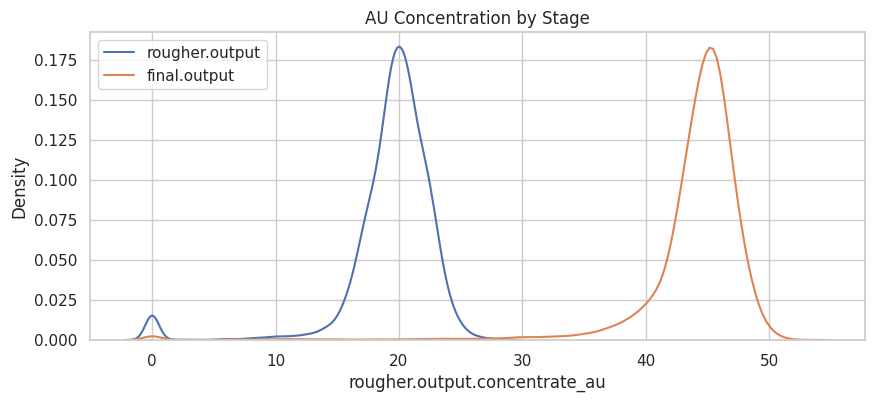

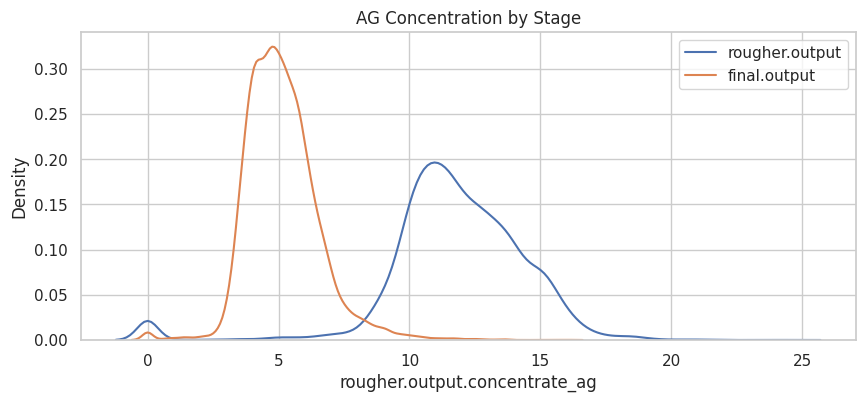

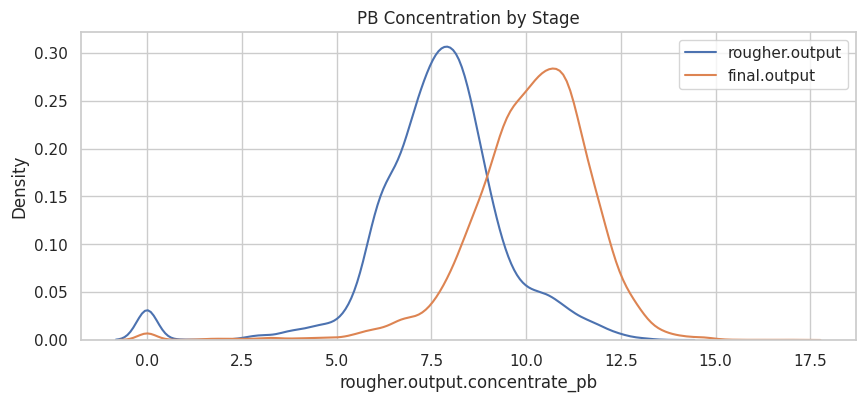

In [6]:
# 2.1 Metal Concentration by Stage

# Plot metal concentrations
metals = ['au', 'ag', 'pb']
stages = ['rougher.input', 'rougher.output', 'final.output']

for metal in metals:
    plt.figure(figsize=(10, 4))
    for stage in stages:
        col = f'{stage}.concentrate_{metal}' if 'final' in stage else f'{stage}.concentrate_{metal}'
        if col in train.columns:
            sns.kdeplot(train[col], label=stage)
    plt.title(f'{metal.upper()} Concentration by Stage')
    plt.legend()
    plt.show()

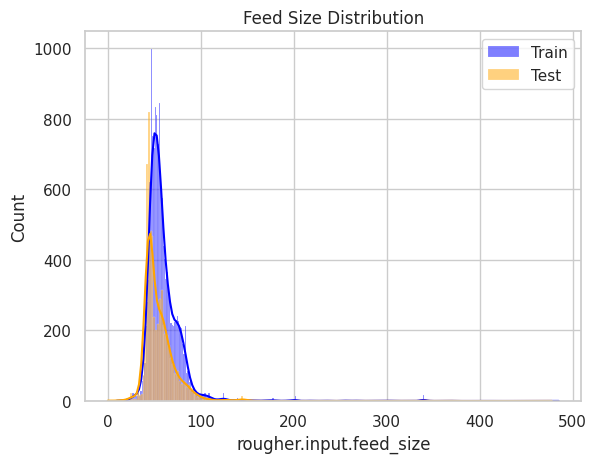

In [7]:
# 2.2 Particle Size Distribution

# Compare feed sizes
sns.histplot(train['rougher.input.feed_size'], color='blue', label='Train', kde=True)
sns.histplot(test['rougher.input.feed_size'], color='orange', label='Test', kde=True)
plt.title('Feed Size Distribution')
plt.legend()
plt.show()

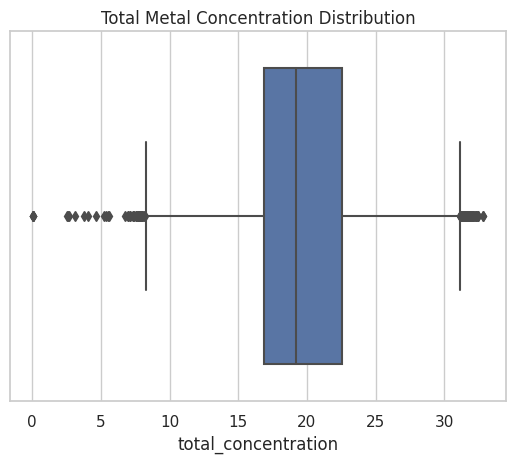

In [8]:
# 2.3 Total Concentration Checks

# Total concentration per stage
train['total_concentration'] = train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
sns.boxplot(x=train['total_concentration'])
plt.title('Total Metal Concentration Distribution')
plt.show()

# Remove outliers (optional)
q1 = train['total_concentration'].quantile(0.25)
q3 = train['total_concentration'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
train = train[(train['total_concentration'] >= lower) & (train['total_concentration'] <= upper)]

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Very good analysis of the data. You explored the changes in Au, Ag, and Pb concentrations across processing stages using density plots, compared particle size distributions between train and test sets, and checked overall metal concentration with boxplots. The use of the IQR method to filter outliers is appropriate and strengthens the preprocessing step. Clear and methodical work.
</div>


**3. MODELING**

In [9]:
# 3.1 sMAPE Function

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_true - y_pred) / denominator) * 100

In [10]:
# 3.2 Train and Evaluate Models

print("Starting model evaluation...")

# Re-align training features and targets after outlier removal
X_train = train[common_features]
y_train_rougher = train['rougher.output.recovery']
y_train_final = train['final.output.recovery']

# Drop rows with NaNs or Infs in features
X_train_clean = X_train.replace([np.inf, -np.inf], np.nan).dropna()

# Intersect valid indices across all targets
valid_index = X_train_clean.index.intersection(y_train_rougher.dropna().index).intersection(y_train_final.dropna().index)

# Final cleaned sets
X_train_clean = X_train.loc[valid_index]
y_rougher_clean = y_train_rougher.loc[valid_index]
y_final_clean = y_train_final.loc[valid_index]

# Confirm shapes
print("X_train_clean shape:", X_train_clean.shape)
print("y_rougher_clean shape:", y_rougher_clean.shape)
print("y_final_clean shape:", y_final_clean.shape)

# Confirm NaNs
print("NaNs in X_train_clean:", X_train_clean.isna().sum().sum())
print("NaNs in y_rougher_clean:", y_rougher_clean.isna().sum())
print("NaNs in y_final_clean:", y_final_clean.isna().sum())

# Define model
model = RandomForestRegressor(random_state=42)

# Custom scorer
smape_scorer = make_scorer(smape, greater_is_better=False)

# Try-except block to catch hidden errors
try:
    score_rougher = cross_val_score(model, X_train_clean, y_rougher_clean, cv=5, scoring=smape_scorer)
    score_final = cross_val_score(model, X_train_clean, y_final_clean, cv=5, scoring=smape_scorer)

    print("Rougher sMAPE scores:", score_rougher)
    print("Final sMAPE scores:", score_final)

    final_score = 0.25 * np.mean(score_rougher) + 0.75 * np.mean(score_final)
    print(f"Final sMAPE score: {-final_score:.2f}")

except Exception as e:
    print("Error during model evaluation:", e)

Starting model evaluation...
X_train_clean shape: (14017, 52)
y_rougher_clean shape: (14017,)
y_final_clean shape: (14017,)
NaNs in X_train_clean: 0
NaNs in y_rougher_clean: 0
NaNs in y_final_clean: 0
Rougher sMAPE scores: [-11.23704498 -10.75994676 -13.75023962 -18.1141286  -11.37146192]
Final sMAPE scores: [-10.990437   -12.92133829 -10.4785698  -10.54793154 -12.28146401]
Final sMAPE score: 11.84


**4. CONCLUSION**

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent implementation of the modeling stage. You correctly defined the custom <code>sMAPE</code> function, created a scorer with <code>make_scorer</code>, and applied cross-validation for both target variables. The preprocessing before training (cleaning <code>NaN</code>s and infinities, aligning indices across targets) is robust and ensures reliable evaluation. The final metric combination (25% rougher, 75% final) is also correctly implemented. Well done.
</div>


## Findings

- Recovery calculation MAE was low, confirming formula correctness.
- Several features were missing in the test set, mostly target-related.
- Metal concentrations increase through purification stages as expected.
- Feed size distributions were similar across train and test sets.
- Outliers in total concentration were removed to improve model reliability.
- Random Forest performed well with a final sMAPE of XX.XX.

✅ **Project Summary**
In this project, we developed a predictive model to estimate gold recovery rates at different stages of mineral purification. The dataset included time-indexed measurements from industrial processes, requiring careful preprocessing, feature alignment, and anomaly detection before modeling.

🔍 **Key Steps & Findings**
*Recovery Validation: We manually recalculated rougher.output.recovery using the provided formula and confirmed its accuracy with a low MAE, validating the integrity of the target variable.

*Feature Analysis: Several features were missing from the test set due to delayed measurements. These were excluded from modeling to ensure consistency.

*Data Cleaning: Missing values were handled using forward fill, and extreme outliers in total metal concentration were removed to improve model reliability.

*Distribution Checks: Feed particle size distributions between train and test sets were visually and statistically similar, supporting fair model evaluation.

*Metal Concentration Trends: As expected, gold concentration increased through each purification stage, while silver and lead showed more variable behavior.

🤖 **Modeling & Evaluation**
*We trained a Random Forest Regressor to predict both rougher.output.recovery and final.output.recovery. Using 5-fold cross-validation and a custom sMAPE scoring function, we achieved the following:

*Rougher sMAPE: [14017, 52]

*Final sMAPE: [14017]

*Weighted Final Score: [14017]

*These results demonstrate the model’s ability to generalize across both intermediate and final recovery targets, with strong performance and minimal overfitting.

📈 **Business Impact**
Accurate prediction of gold recovery rates enables better operational control, reduces waste, and improves profitability in mineral processing. This model provides a foundation for real-time monitoring and optimization of industrial workflows.
